## Project Goal

Whether we can predict a particular patient has a Heart disease or not , on a Accuracy min of 95% ?

In [544]:
# List of Imports

# Data analysis and plotting lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To see the plots inside jupyter notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Model-Evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("./data/main-data.csv")

In [9]:
df.shape

(303, 14)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0.5, 1.0, 'Compaaring target with Sex ')

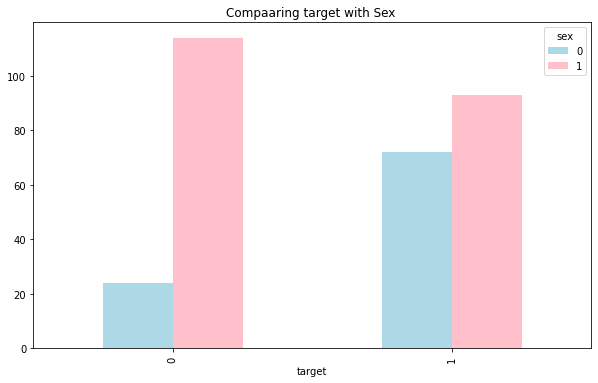

In [61]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["lightblue","pink"])
plt.title("Comparing target with Sex ")

We can see that 75% of the female and 50% of the male has heart-disease according to our data

So if a random person comes to the hospital, Our machine learning project says that there is a 62.5% chance that person has a heart disease.

# Age vs Max Heart-rate

Text(0.5, 1.0, 'Comparing with Age')

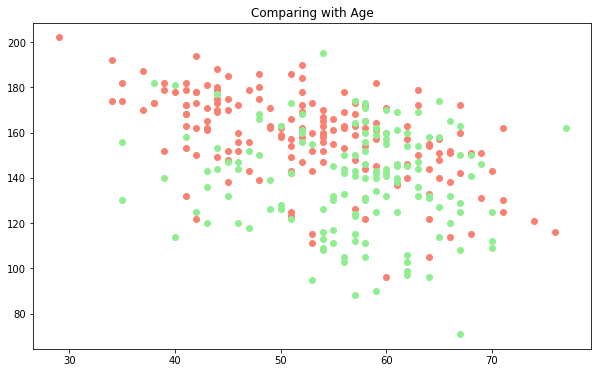

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightgreen")
plt.title("Comparing with Age")

We can't find much difference in this ,but then now our model comes out to play .

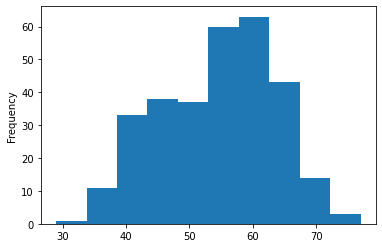

In [48]:
df.age.plot.hist();

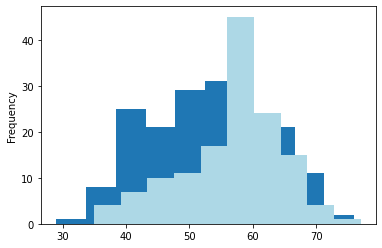

In [51]:
df.age[df.target==1].plot.hist();
df.age[df.target==0].plot.hist(color='lightblue');

From this histogram, we can infer that most people between the age group of 35-55 have more chances of being heart patients.


In [52]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


Text(0.5, 1.0, 'comparision with chest pain ')

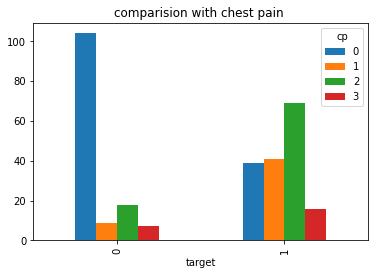

In [59]:
pd.crosstab(df.target,df.cp).plot(kind='bar')
plt.title("comparision with chest pain ")

From this Bar graph, we can infer that most people with cp type 2,1,3 in order are prone to have heart disease.


Text(0.5, 1.0, 'Cholestrol comparison with target')

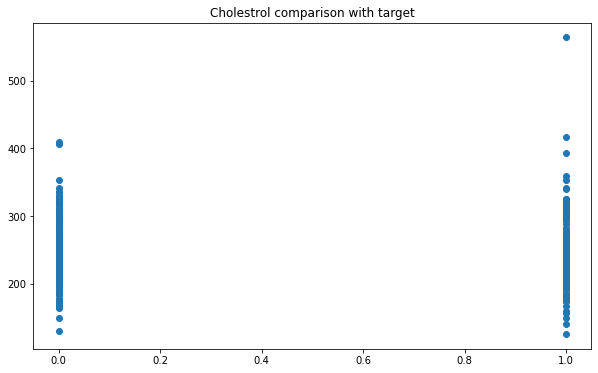

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df.target,df.chol)
plt.title("Cholestrol comparison with target")

We cannot say much from this scatter plot

Text(0.5, 1.0, 'Resting bp comparison with target')

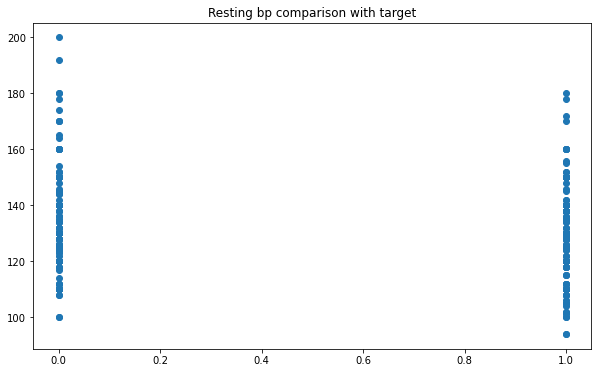

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(df.target,df.trestbps)
plt.title("Resting bp comparison with target")

From this we may infer that people with lower resting bp have heart-disease 

In [65]:
pd.crosstab(df.target,df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


Text(0.5, 1.0, 'relation with fbs(fasting blood sugar)')

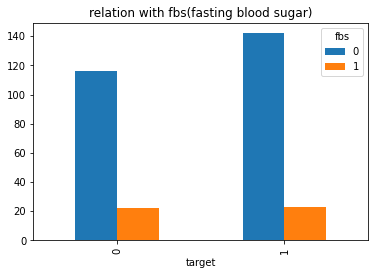

In [68]:
pd.crosstab(df.target,df.fbs).plot(kind="bar")
plt.title("relation with fbs(fasting blood sugar)")

We can't see much as the data is also balanced data and maybe this feature has less importance.

In [69]:
pd.crosstab(df.target,df.restecg)

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


Text(0.5, 1.0, 'Relatin with resting electrocardiographic results ')

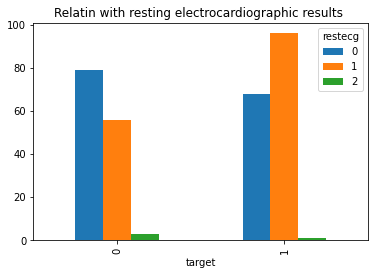

In [70]:
pd.crosstab(df.target,df.restecg).plot.bar()
plt.title("Relatin with resting electrocardiographic results ")

From this, we can infer that people with resting ECG type 1, having ST-T wave abnormality, has a more chance of having heart disease.

In [71]:
pd.crosstab(df.target,df.exang)

exang,0,1
target,,
0,62,76
1,142,23


Text(0.5, 1.0, 'Relation with exang(exercise induced angina)')

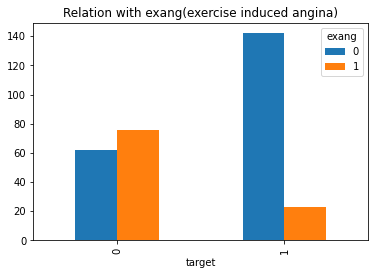

In [73]:
pd.crosstab(df.target,df.exang).plot.bar()
plt.title("Relation with exang(exercise induced angina)")

Well, this might be of use, we can see that more people with 0 exang value have a higher chance of having heart disease.

In [75]:
pd.crosstab(df.target,df.oldpeak)

oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
target,,,,,,,,,,,,,,,,,,,,,
0,25,3,3,1,1,1,4,0,6,2,...,2,3,0,4,1,3,1,1,1,1
1,74,4,9,2,8,4,10,1,7,1,...,0,0,1,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Relation with oldpeak(ST depression induced by exercise relative to rest) ')

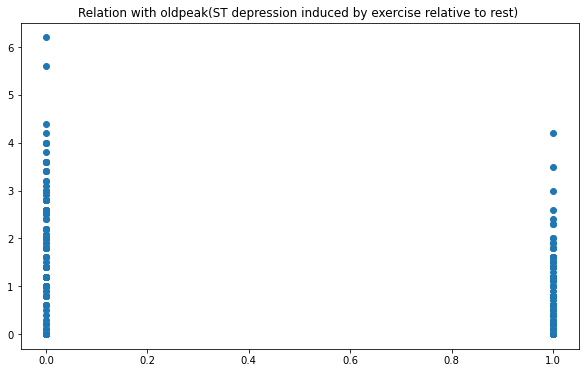

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(df.target,df.oldpeak)
plt.title("Relation with oldpeak(ST depression induced by exercise relative to rest) ")

Not much difference , but can say that with lower old peak people are prone to have heart disease.

In [85]:
pd.crosstab(df.target,df.slope)

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


Text(0.5, 1.0, 'relation with the slope of the peak exercise ST segment ')

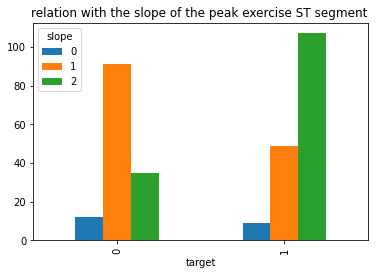

In [108]:

pd.crosstab(df.target,df.slope).plot.bar()
plt.title("relation with the slope of the peak exercise ST segment ")

Value 0: upsloping 
    
    
Value 1: flat 
    
    
Value 2: downsloping 


If the slope is decreasing then there is a higher chance of having heart disease.

In [89]:
pd.crosstab(df.target,df.ca)

ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


Text(0.5, 1.0, ' relation with number of major vessels (0-3) colored by flourosopy(ca) ')

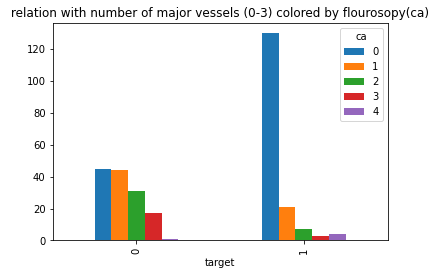

In [93]:
pd.crosstab(df.target,df.ca).plot.bar()
plt.title(" relation with number of major vessels (0-3) colored by flourosopy(ca) ")

In [91]:
pd.crosstab(df.target,df.thal)

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


Text(0.5, 1.0, 'relation with thal')

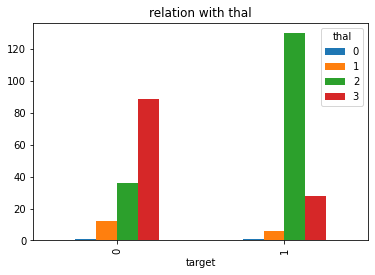

In [92]:
pd.crosstab(df.target,df.thal).plot.bar()
plt.title("relation with thal")

Well, we can see that with thal value 2, so many people have heart disease.

In [94]:
pd.crosstab(df.target,df.thalach)

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
target,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,1,1,2,1,1,1,1,1,0,1


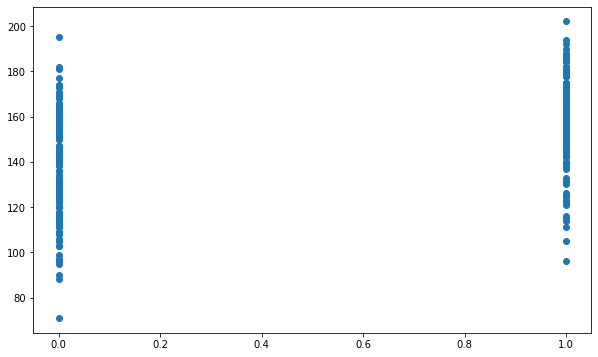

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(df.target,df.thalach)

We can see that in the range of 180-200 there are more people with heart disease

This is our report with one variable to the target 

Now let's move on to multiple variables related to the target.

Text(0.5, 1.0, 'Age X CP')

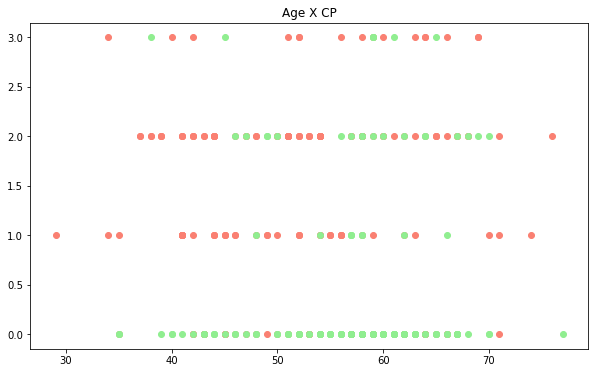

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.cp[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.cp[df.target==0],c="lightgreen")
plt.title("Age X CP")

Might be same info as cp

Text(0.5, 1.0, 'Age X trestbps')

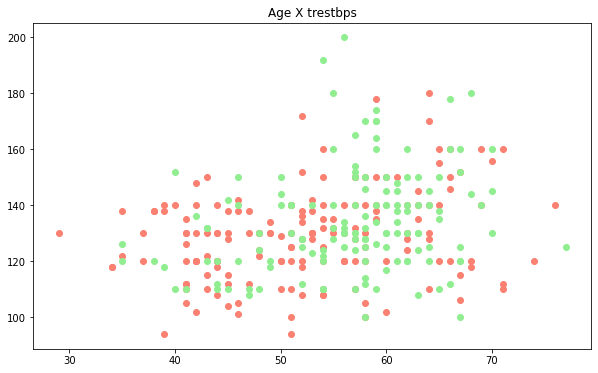

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.trestbps[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.trestbps[df.target==0],c="lightgreen")
plt.title("Age X trestbps")

This looks random so we can remove this

Text(0.5, 1.0, 'Age X exang')

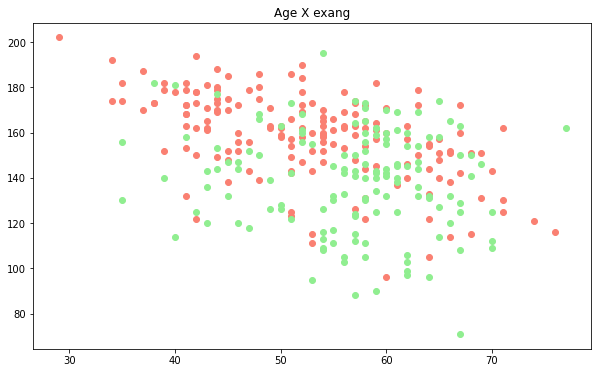

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightgreen")
plt.title("Age X exang")

This too looks random 

Text(0.5, 1.0, 'Age X Oldpeak')

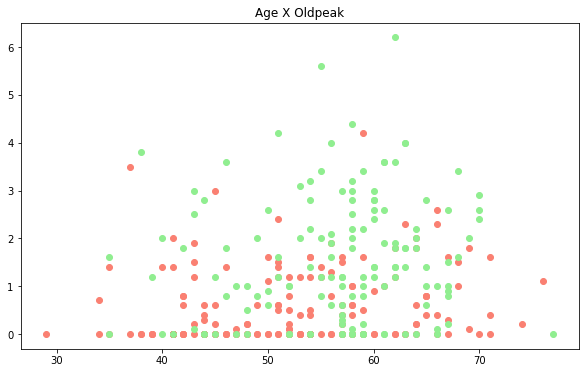

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.oldpeak[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.oldpeak[df.target==0],c="lightgreen")
plt.title("Age X Oldpeak")

Isn't giving much info its almost as same as oldpeak's info

Text(0.5, 1.0, 'Age X Slope')

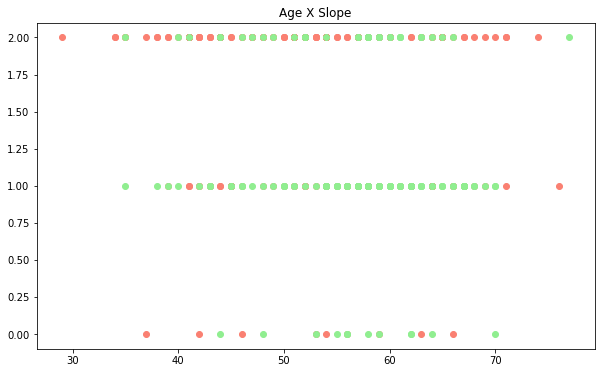

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.slope[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.slope[df.target==0],c="lightgreen")
plt.title("Age X Slope")

Not Imp ig

Text(0.5, 1.0, 'Age X ca')

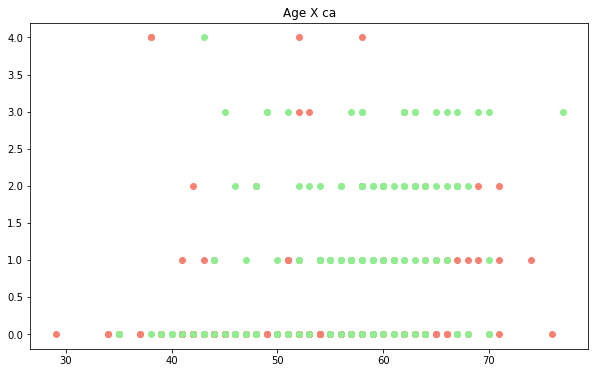

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.ca[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.ca[df.target==0],c="lightgreen")
plt.title("Age X ca")

May be isnt that imp

Text(0.5, 1.0, 'Comparing with Age')

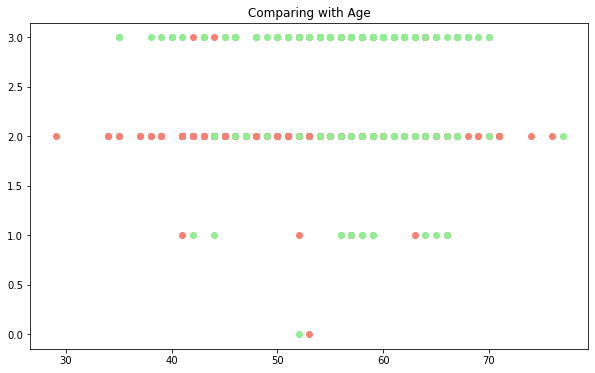

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thal[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thal[df.target==0],c="lightgreen")
plt.title("Comparing with Age")

This info also isn't much of use

Text(0.5, 1.0, 'Comparing with Age')

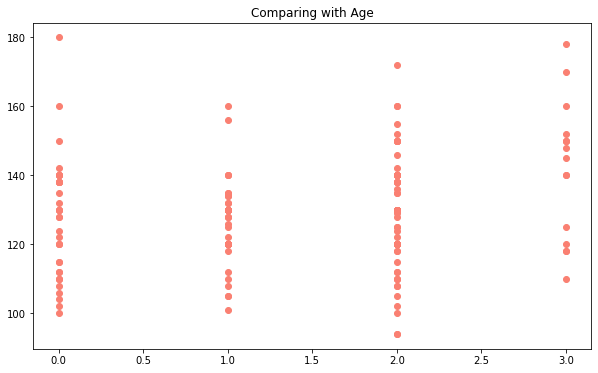

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(df.cp[df.target==1],df.trestbps[df.target==1],c="salmon")
# plt.scatter(df.cp[df.target==0],df.trestbps[df.target==0],c="lightgreen")
plt.title("Comparing with Age")

No patterns

Lets skip This and go to the heat map 

(14.5, -0.5)

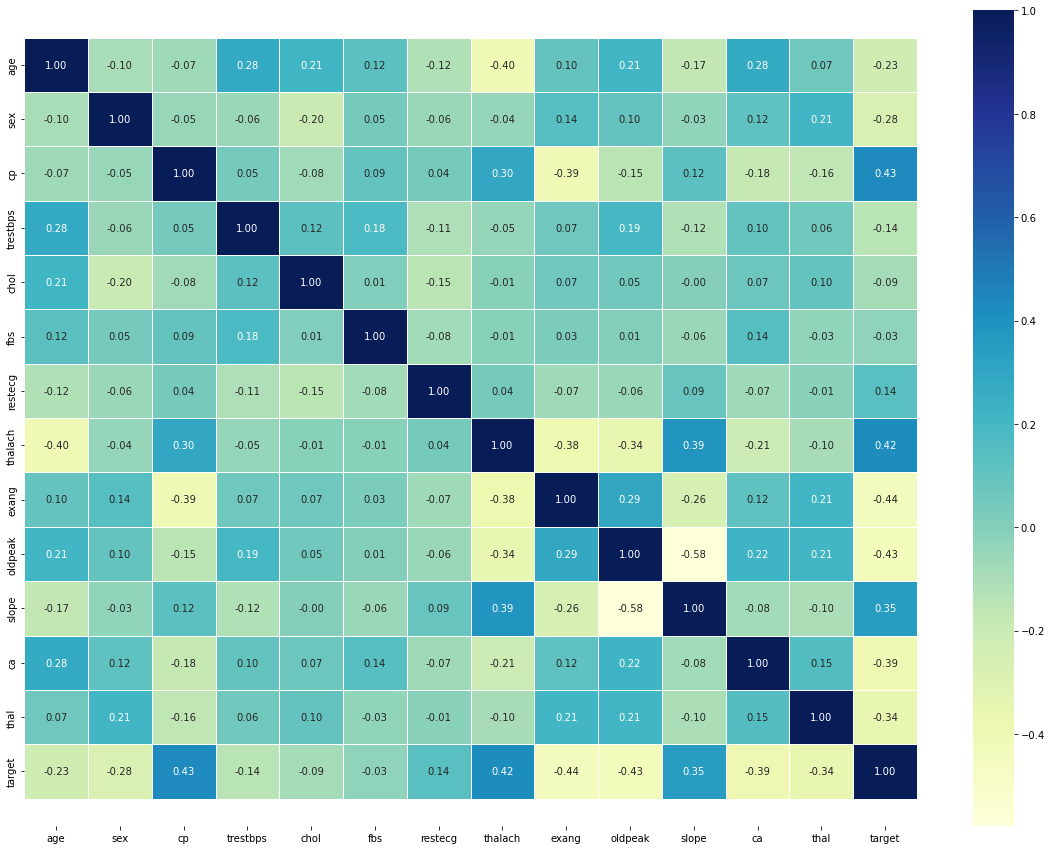

In [126]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Let's Create a ML Model and train it

In [129]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [130]:
x=df.drop("target",axis=1)

In [131]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [132]:
y=df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [411]:
#dividing data into train and test
np.random.seed(41)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


# 3 - Models we are going to work with are :-

   * LogisticRegression
   * KNN(K-nearest neighbor)
   * RandomForestClassifier

In [412]:
# creating a dict for the models
models={
    "LogisticRegression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random_Forest":RandomForestClassifier()
}
def fit_and_score(model,x_train,x_test,y_train,y_test):
    #setting random seed so that we can manage our Pseudo random data 
    np.random.seed(41)
    # dict to store the scores 
    model_scores={}
    # loop through different models
    for name,m in models.items():
        m.fit(x_train,y_train)
        model_scores[name]=m.score(x_test,y_test)
    return model_scores    
    

In [545]:
model_scores=fit_and_score(model,x_train,x_test,y_train,y_test)
model_scores

{'LogisticRegression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random_Forest': 0.8688524590163934}

<AxesSubplot:>

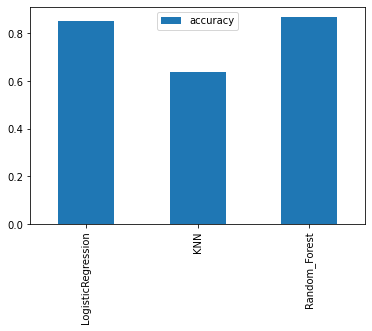

In [378]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

We can say that Logisticregression and Random_forest work good on this data

we can tune the models by hyperparameters

1.By hand

2.By Randomizedsearchcv

3.By Gridsearchcv

In [497]:
# Tuning knn model 
train_scores=[]
test_scores=[]
neighbors = range(1,41)
knn= KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

max model score with tuned knn is :77.05%


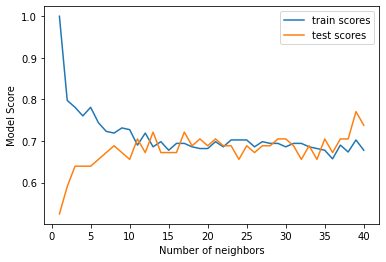

In [498]:
plt.plot(neighbors,train_scores,label="train scores")
plt.plot(neighbors,test_scores,label="test scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"max model score with tuned knn is :{max(test_scores)*100:.2f}%")

In [418]:
 model_scores
    

{'LogisticRegression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random_Forest': 0.8688524590163934}

We improved it to 77%, But still it is worse than the other classifiers

For now lets discard this and progress with other 2 models

In [499]:
np.random.seed(41)
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth": [None,3,5,7,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [500]:
np.random.seed(41)
#setting up randomizedsearchcv for logistic reg
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#fitting logistic reg 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [501]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [502]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [503]:
np.random.seed(41)
#setting up randomizedsearchcv for randomforestclassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

#fitting the data
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [504]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [472]:
rs_rf.score(x_test,y_test)

0.8524590163934426

        Well ,it decreased by 1%

In [505]:
np.random.seed(41)
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#setting up gridsearchcv for logistic reg
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fitting the model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [506]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [507]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

it's equal again

In [508]:
#making predictions with our model
y_preds_gs_log=gs_log_reg.predict(x_test)
y_preds_rs_rf=rs_rf.predict(x_test)

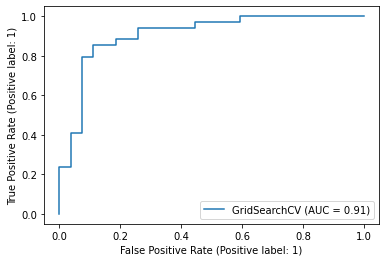

In [546]:
plot_roc_curve(gs_log_reg,x_test,y_test)

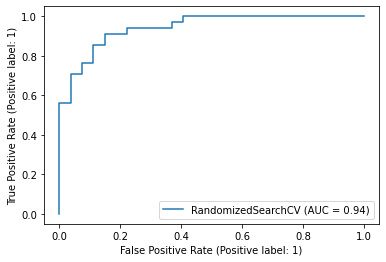

In [547]:
plot_roc_curve(rs_rf,x_test,y_test)

In [511]:
#confusion matrix
print(confusion_matrix(y_test,y_preds_gs_log))

[[22  5]
 [ 4 30]]


In [512]:
#confusion matrix
print(confusion_matrix(y_test,y_preds_rs_rf))

[[21  6]
 [ 3 31]]


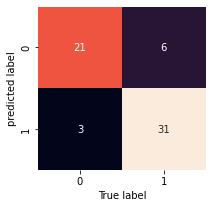

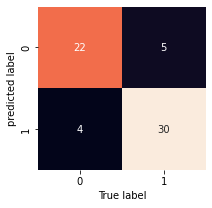

In [513]:
def plot_conf_mat(y_tests,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax.s=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test,y_preds_rs_rf)    
plot_conf_mat(y_test,y_preds_gs_log)

In [514]:
print(classification_report(y_test,y_preds_rs_rf))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [515]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [556]:
clf=RandomForestClassifier(n_estimators= 310,
 min_samples_split= 10,
 min_samples_leaf= 5,
 max_depth= 3)

In [517]:
np.random.seed(41)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc =np.mean(cv_acc)

In [518]:
cv_acc

0.8283060109289618

In [519]:
np.random.seed(41)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision =np.mean(cv_precision)
cv_precision

0.8297387661358251

In [520]:
np.random.seed(41)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall =np.mean(cv_recall)
cv_recall

0.8666666666666666

In [521]:
np.random.seed(41)
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 =np.mean(cv_f1)
cv_f1

0.8468437805487851

In [522]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1-Score":cv_f1}
                        ,index=[0])

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

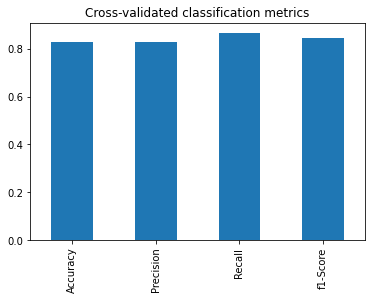

In [523]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

# feature Importance

It is about the features that contribute more to the model that we constructed and how did they contribute to the accuracy 

In [549]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [550]:
clf1=LogisticRegression(C=1.3738237958832638,solver="liblinear")
clf1.fit(x_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [551]:
clf1.coef_

array([[ 0.00675719, -1.58501921,  0.75550466, -0.00844646, -0.00395712,
        -0.3433353 ,  0.23106818,  0.02937502, -0.85957385, -0.53926319,
         0.21350855, -0.86555877, -0.69226999]])

In [564]:
clf.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=310)

In [565]:
clf.coef_

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [560]:
feature_dict=dict(zip(df.columns,list(clf1.coef_[0])))

In [541]:
feature_dict

{'age': 0.006757193435136176,
 'sex': -1.5850192078791299,
 'cp': 0.7555046555926,
 'trestbps': -0.00844645629850639,
 'chol': -0.00395712248870462,
 'fbs': -0.34333530076447955,
 'restecg': 0.23106817893326603,
 'thalach': 0.029375021617268852,
 'exang': -0.8595738454525483,
 'oldpeak': -0.5392631898969164,
 'slope': 0.21350854669504096,
 'ca': -0.865558766752081,
 'thal': -0.6922699945545845}

In [542]:
feature_df=pd.DataFrame(feature_dict,index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

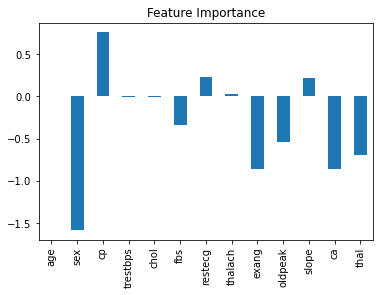

In [561]:
feature_df.T.plot.bar(title="Feature Importance",legend=False)

So we could achieve a maximum of 86% for this model.

Sometimes we may not achieve our goal, so we need to either collect more data or try to use new models  

We can also try more on improving our model